# Задание 1. Обнаружение и обработка пропущенных значений #
**Датасет:** titanic(пассажиры Титаника)
**Источник:** seaborn.load_dataset("titanic")

**Инструкции**:
1. Загрузите датасет titanic
2. Определите количество пропущенных значений в каждом столбце.
3. Визуализируйте пропуски с помощью библиотеки missingno
4. Заполните пропущенные значения
   - признак age — средним значением;
   - признак embarked — наиболее частым значением;
   - признак deck — удалите.
5. Отобразите информацию о таблице до и после обработки ( .info() , .isna().sum() ).

Количество пропущенных значений до обработки:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


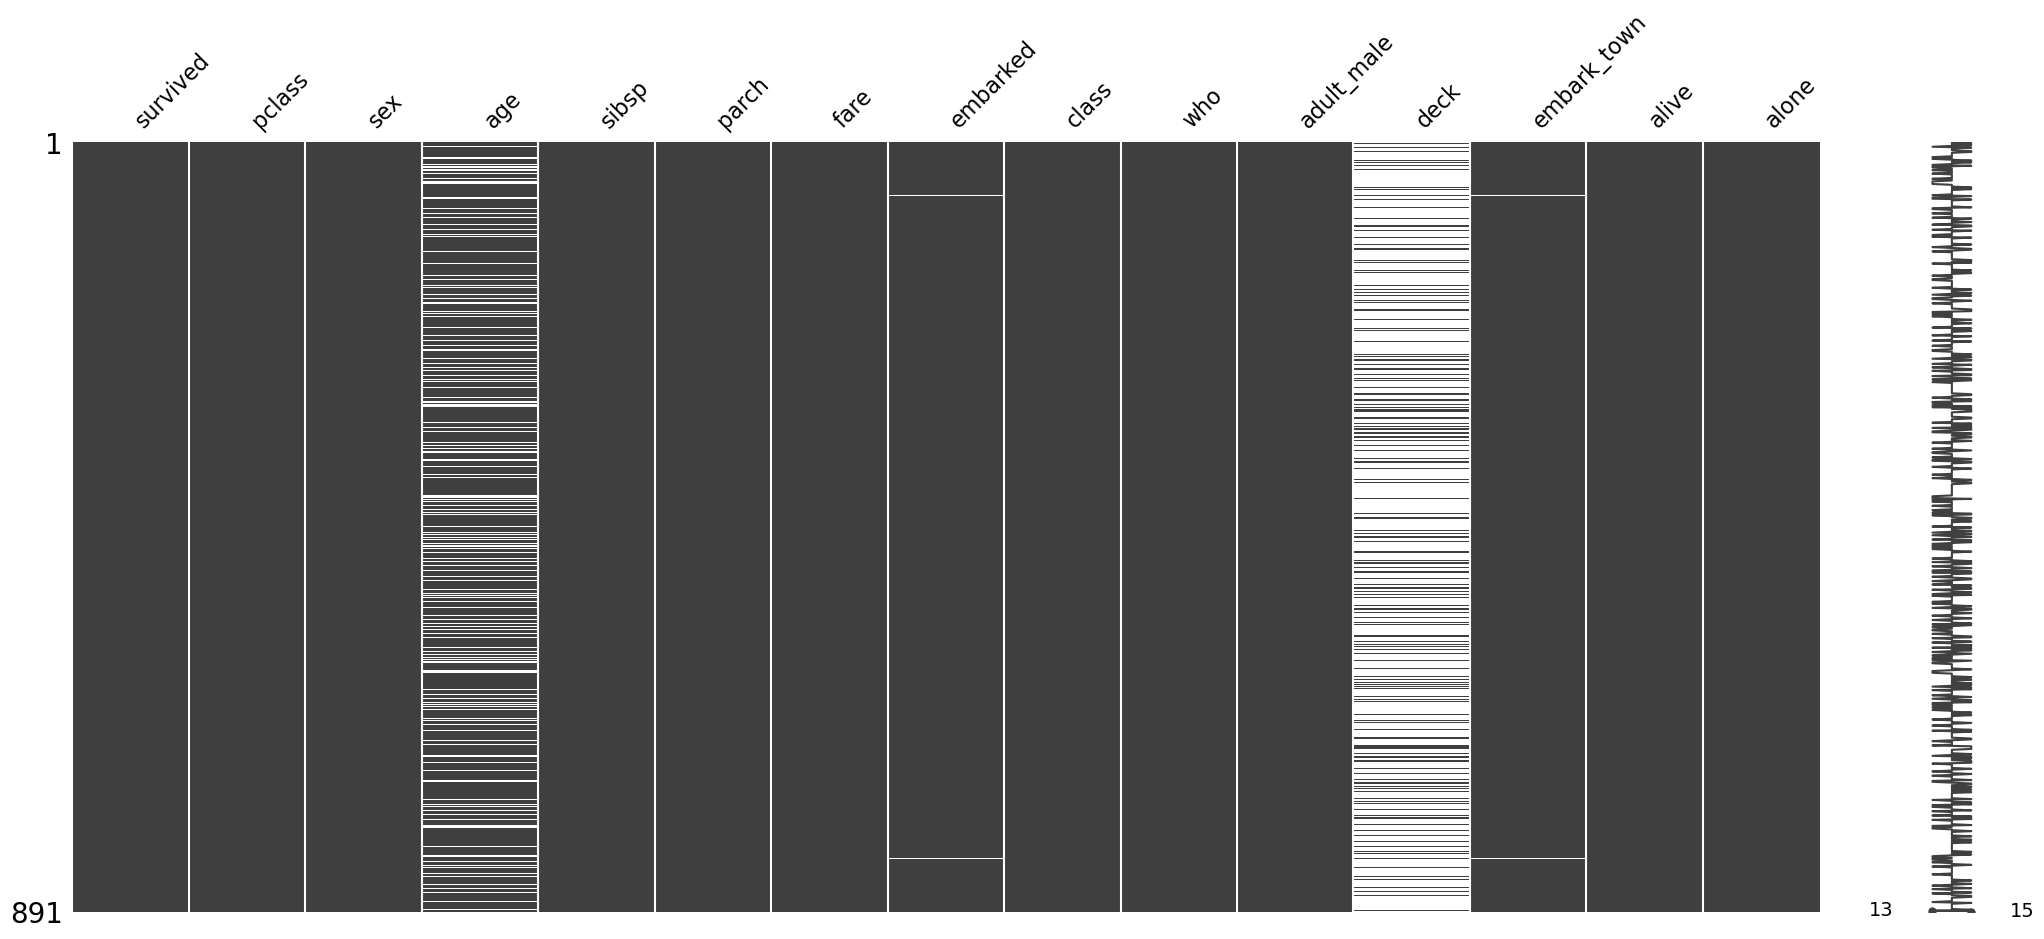


Количество пропущенных значений после обработки:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

Информация о таблице после обработки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool 

In [4]:
import seaborn as sns
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Загрузка датасета
df = sns.load_dataset("titanic")

# Определение количества пропущенных значений
print("Количество пропущенных значений до обработки:")
print(df.isna().sum())

# Визуализация пропусков
msno.matrix(df)
plt.show()

# Заполнение пропусков
df['age'] = df['age'].fillna(df['age'].mean())  # Среднее значение
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])  # Наиболее частое значение
df = df.drop(columns=['deck'])  # Удаление столбца

# Проверка после обработки
print("\nКоличество пропущенных значений после обработки:")
print(df.isna().sum())

# Общая информация
print("\nИнформация о таблице после обработки:")
print(df.info())

# Задание 2. Обнаружение и удаление выбросов #

**Датасет:** penguins (описание антарктических пингвинов)

**Источник:** seaborn.load_dataset("penguins")

**Инструкции**:
1. Загрузите датасет penguins .
2.  Постройте boxplot-графики для признаков bill_length_mm , bill_depth_mm ,flipper_length_mm , body_mass_g .
3.  Используя метод межквартильного размаха (IQR), выявите и удалите выбросы по каждому из указанных признаков.
4.  Сравните размеры датасета до и после фильтрации.
5.  Постройте boxplot-график до и после удаления выбросов для одного из признаков.

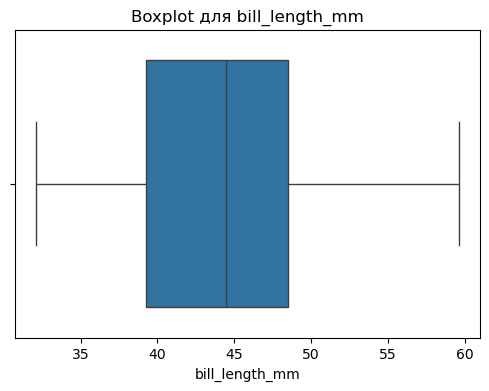

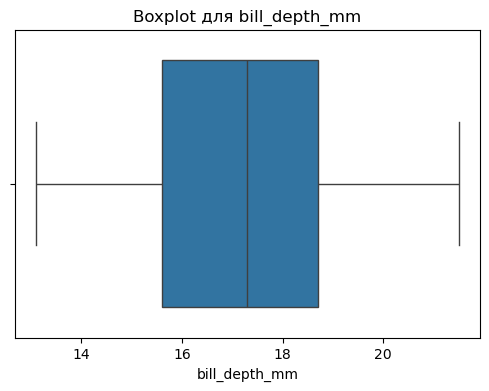

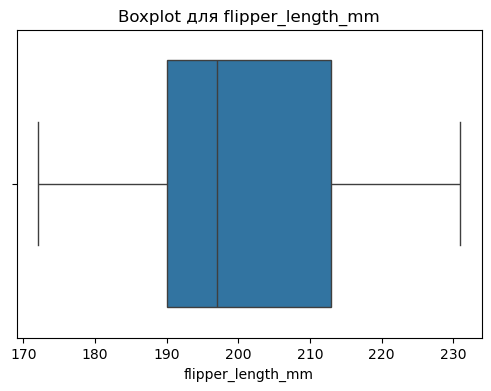

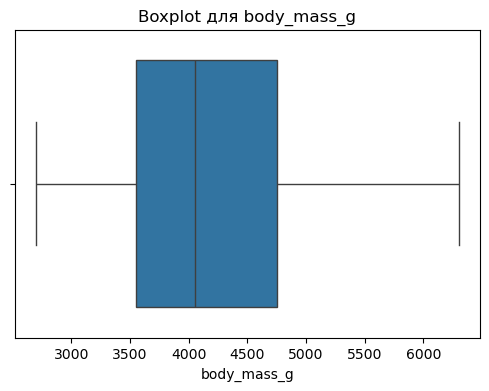

Размер датасета до удаления выбросов: 344
Размер датасета после удаления выбросов: 342


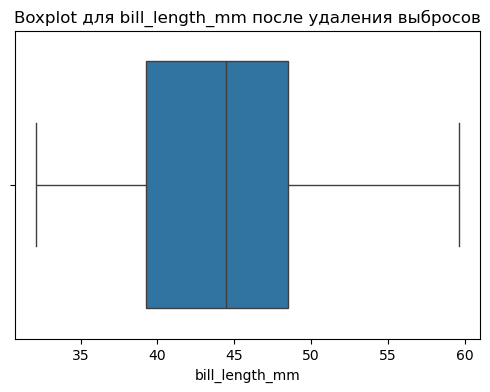

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка датасета
df = sns.load_dataset("penguins")

# Построение boxplot для указанных признаков
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot для {col}")
    plt.show()

# Удаление выбросов с использованием IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

original_size = df.shape[0]
for col in numeric_cols:
    df = remove_outliers(df, col)
new_size = df.shape[0]

# Сравнение размеров датасета
print(f"Размер датасета до удаления выбросов: {original_size}")
print(f"Размер датасета после удаления выбросов: {new_size}")

# Boxplot после удаления выбросов
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['bill_length_mm'])
plt.title("Boxplot для bill_length_mm после удаления выбросов")
plt.show()

# Задание 3. Масштабирование числовых признаков #

**Датасет:** california housing

**Источник:** from sklearn.datasets import fetch_california_housing

**Инструкции:**
1. Загрузите данные с помощью fetch_california_housing(as_frame=True)
2. Преобразуйте данные в pandas.DataFrame .
3. Выполните:
   - стандартизацию признаков с помощью StandardScaler
   - нормализацию в диапазон [0, 1] с помощью MinMaxScaler (на копии таблицы).
4. Постройте гистограммы распределения признака MedInc до и после масштабирования.
5. Сравните поведение шкал на гистограммах.

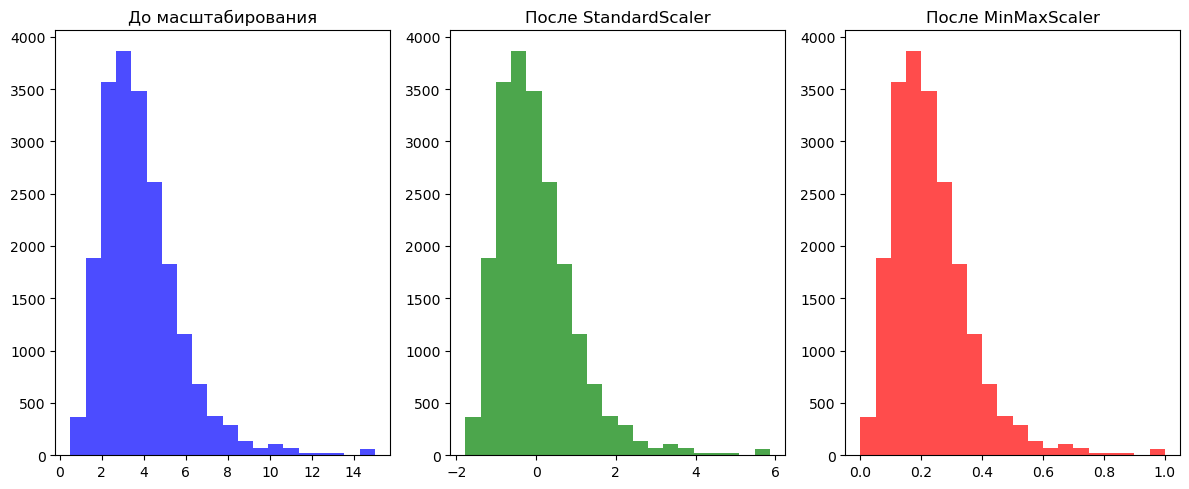

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
data = fetch_california_housing(as_frame=True)
df = data.frame

# Стандартизация
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[df.columns] = scaler_standard.fit_transform(df)

# Нормализация
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[df.columns] = scaler_minmax.fit_transform(df)

# Гистограммы до и после масштабирования
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.hist(df['MedInc'], bins=20, color='blue', alpha=0.7)
plt.title("До масштабирования")

plt.subplot(1, 3, 2)
plt.hist(df_standardized['MedInc'], bins=20, color='green', alpha=0.7)
plt.title("После StandardScaler")

plt.subplot(1, 3, 3)
plt.hist(df_normalized['MedInc'], bins=20, color='red', alpha=0.7)
plt.title("После MinMaxScaler")

plt.tight_layout()
plt.show()

# Задание 4. Кодирование категориальных признаков #

**Датасет:** adult (перепись населения США, income dataset)

**Источник:** https://archive.ics.uci.edu/ml/datasets/adult

**Инструкции:**
1. Загрузите данные и отберите признаки:
   - категориальные: education , marital-status , occupation ;
   - целевой признак: income.
2. Проведите Label Encoding для признака education , предполагая, что уровни образования упорядочены.
3. Примените One-Hot Encoding к признакам marital-status и occupation .
4. Проверьте итоговую размерность таблицы до и после кодирования.
5. Убедитесь, что в one-hot-кодировании не присутствует дамми-ловушка.

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Загрузка данных
file_path = "C:\\Users\\vadim\\jupyter-workspace\\AI_ML_LR_6\\data\\adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'income']

df = pd.read_csv(file_path, header=None, names=columns, na_values=' ?', skipinitialspace=True)

# Выбор нужных признаков
categorical_features = ['education', 'marital-status', 'occupation']
target_feature = 'income'

# Просмотр информации о данных перед обработкой
print("Информация о данных перед обработкой:")
print(df[categorical_features + [target_feature]].info())
print("\nПервые 5 строк данных:")
print(df[categorical_features + [target_feature]].head())

# 1. Label Encoding для признака education (предполагаем порядок)
# Создаем порядок уровней образования (от низшего к высшему)
education_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 
    'Prof-school', 'Doctorate'
]

# Создаем словарь для соответствия
education_mapping = {v: i for i, v in enumerate(education_order)}

# Применяем Label Encoding
df['education_encoded'] = df['education'].map(education_mapping)

# Проверяем результат
print("\nРезультат Label Encoding для education:")
print(df[['education', 'education_encoded']].head(10))

# 2. One-Hot Encoding для marital-status и occupation
# Сначала проверим наличие пропущенных значений
print("\nКоличество пропущенных значений:")
print(df[['marital-status', 'occupation']].isna().sum())

# Заполним пропуски в occupation модой
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

# Применяем One-Hot Encoding с исключением одного столбца (избегаем дамми-ловушку)
df_encoded = pd.get_dummies(df, columns=['marital-status', 'occupation'], drop_first=True)

# Проверяем результат
print("\nСтолбцы после One-Hot Encoding:")
print(df_encoded.filter(regex='marital-status|occupation').columns)

# Проверяем итоговую размерность таблицы
print("\nРазмерность таблицы до кодирования:", df.shape)
print("Размерность таблицы после кодирования:", df_encoded.shape)

# Проверяем, что нет дамми-ловушки (один столбец удален для каждой категории)
print("\nПроверка на дамми-ловушку:")
print("Уникальные значения marital-status:", df['marital-status'].nunique())
print("Количество столбцов после кодирования:", 
      len(df_encoded.filter(regex='marital-status').columns))
print("Уникальные значения occupation:", df['occupation'].nunique())
print("Количество столбцов после кодирования:", 
      len(df_encoded.filter(regex='occupation').columns))

# Сохраняем обработанные данные
output_path = "C:\\Users\\vadim\\jupyter-workspace\\AI_ML_LR_6\\data\\adult_processed.csv"
df_encoded.to_csv(output_path, index=False)
print(f"\nОбработанные данные сохранены в: {output_path}")

Информация о данных перед обработкой:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   education       32561 non-null  object
 1   marital-status  32561 non-null  object
 2   occupation      32561 non-null  object
 3   income          32561 non-null  object
dtypes: object(4)
memory usage: 1017.7+ KB
None

Первые 5 строк данных:
   education      marital-status         occupation income
0  Bachelors       Never-married       Adm-clerical  <=50K
1  Bachelors  Married-civ-spouse    Exec-managerial  <=50K
2    HS-grad            Divorced  Handlers-cleaners  <=50K
3       11th  Married-civ-spouse  Handlers-cleaners  <=50K
4  Bachelors  Married-civ-spouse     Prof-specialty  <=50K

Результат Label Encoding для education:
   education  education_encoded
0  Bachelors                 12
1  Bachelors                 12
2    HS-grad               

C:\Users\vadim\AppData\Local\Temp\ipykernel_18300\1615024927.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)


# Задание 5. Комплексный EDA #
**Датасет:** heart disease (заболевания сердца)

**Источник:** https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

**Инструкции:** Выполните полный цикл EDA:
1. Обзор структуры данных ( .info() , .describe() ).
2. Обнаружение и обработка пропущенных значений.
3. Обнаружение и удаление выбросов по признакам: age , cholesterol , restingbp , maxhr
4. Масштабирование числовых признаков.
5. Кодирование категориальных признаков: sex , chestpain , exerciseangina , restecg .
6. Подготовьте отчёт в виде Jupyter-ноутбука с комментариями к каждому этапу и промежуточными результатами

Первые 5 строк датасета:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None


Описательная статистика:


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


Количество пропущенных значений в каждом столбце:


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

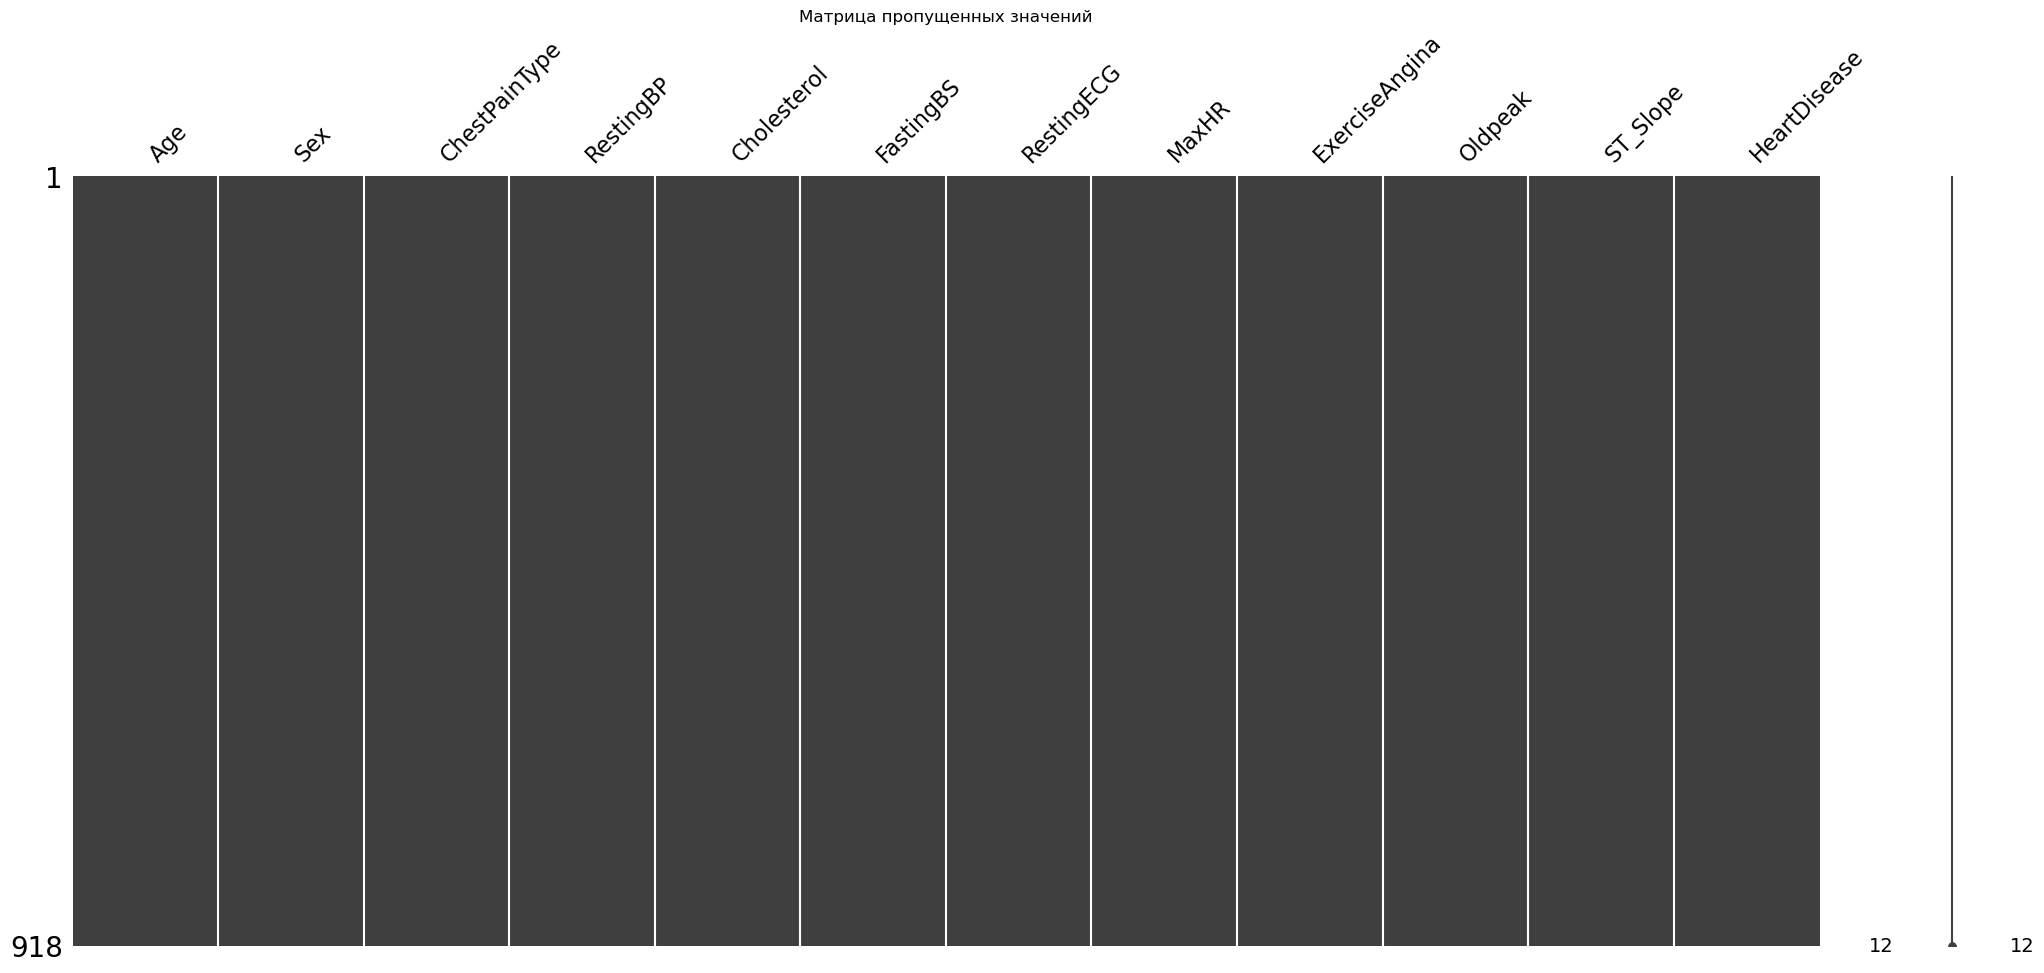

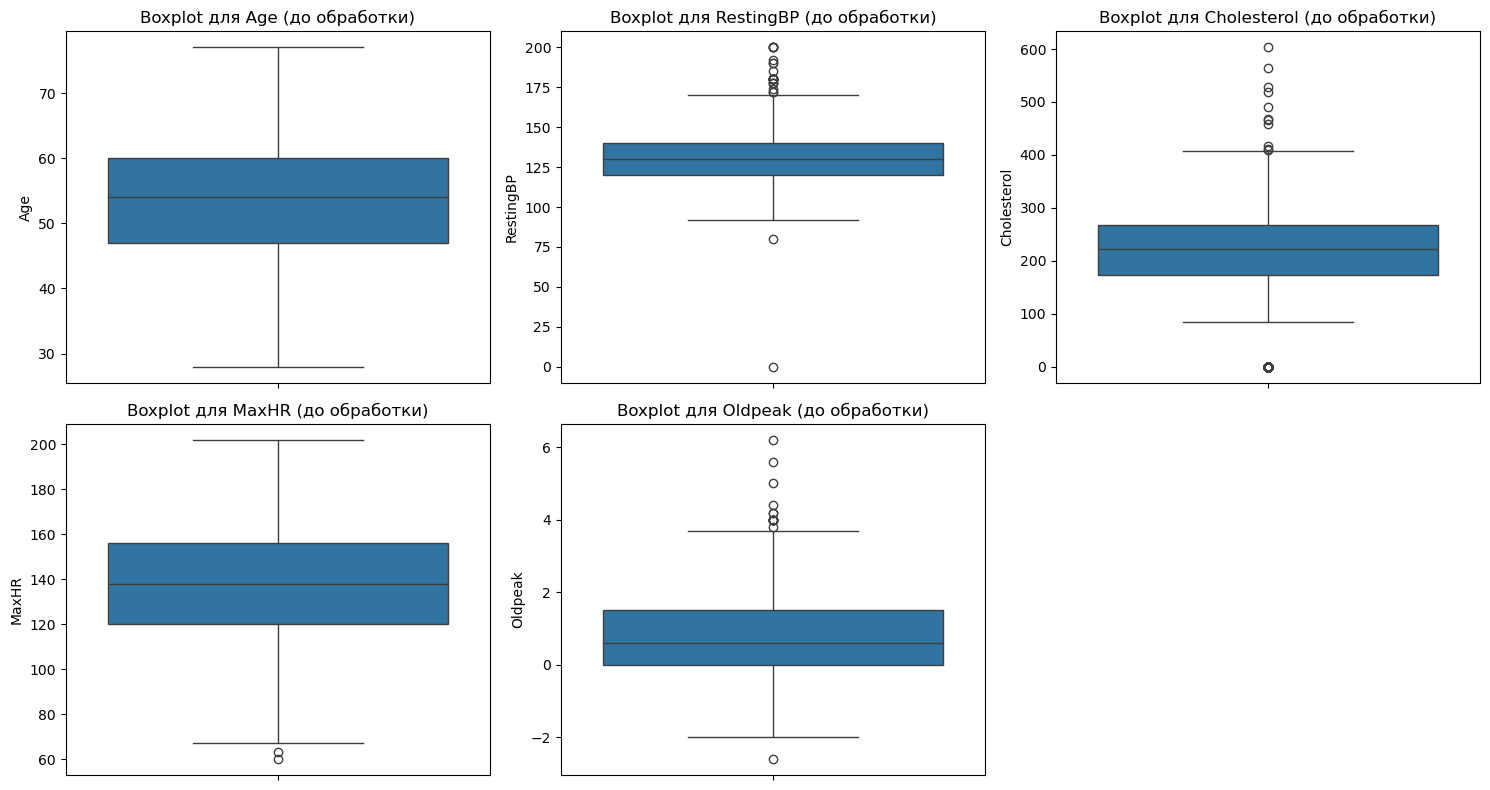

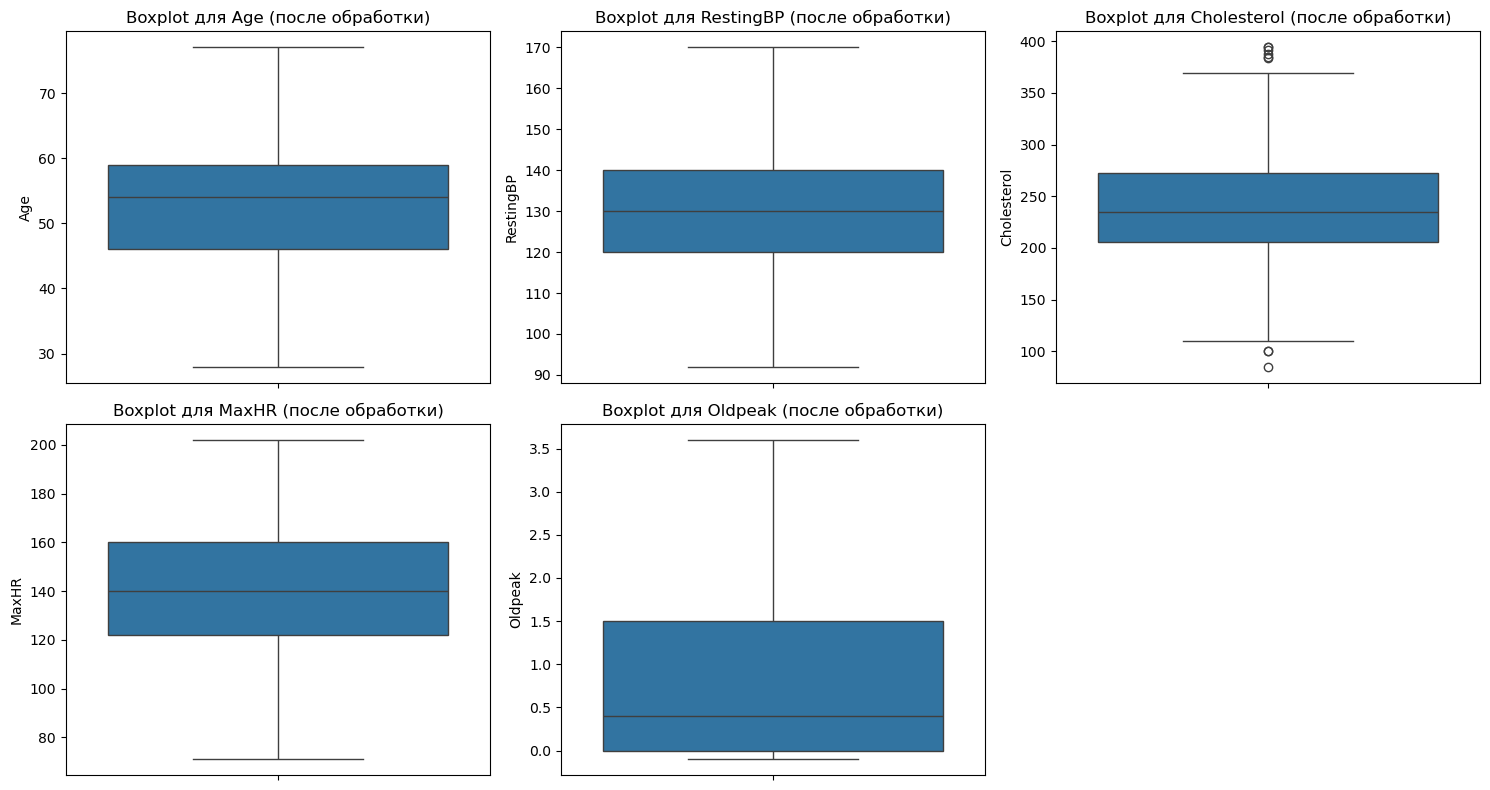

Размер датасета до удаления выбросов: 918
Размер датасета после удаления выбросов: 701
Удалено записей: 217 (23.64%)


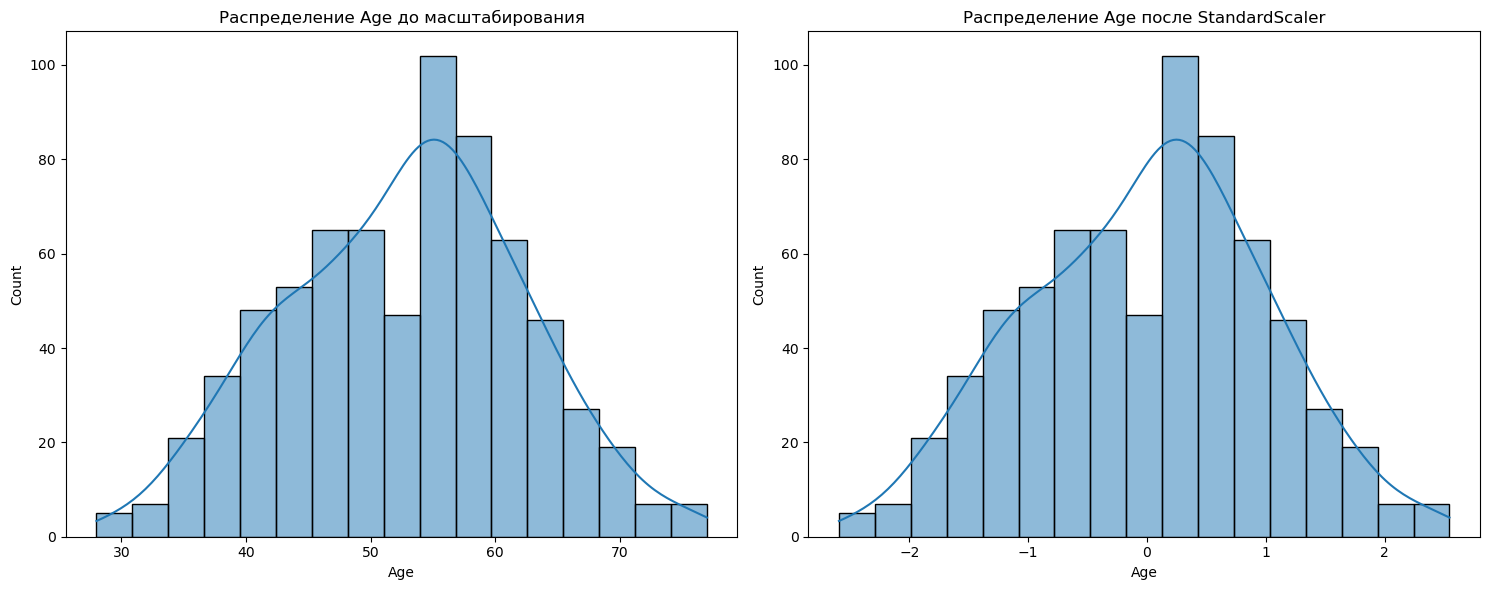


Средние значения после StandardScaler:


Age           -4.054452e-17
RestingBP      7.880841e-16
Cholesterol    2.458012e-16
MaxHR          4.257175e-16
Oldpeak       -1.013613e-16
dtype: float64


Стандартные отклонения после StandardScaler:


Age            1.000714
RestingBP      1.000714
Cholesterol    1.000714
MaxHR          1.000714
Oldpeak        1.000714
dtype: float64

Размерность до кодирования: (701, 12)
Размерность после кодирования: (903, 15)

Первые 5 строк итогового датасета:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y
0,-1.334331,0.548422,0.984547,0.0,1.290461,-0.864955,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.390470,1.845686,-1.182352,0.0,0.633456,0.178110,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-1.648952,-0.100209,0.865268,0.0,-1.748185,-0.864955,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.495344,0.418696,-0.506439,0.0,-1.337557,0.699642,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.133897,1.197054,-0.884155,0.0,-0.762678,-0.864955,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


Информация об итоговом датасете:
<class 'pandas.core.frame.DataFrame'>
Index: 903 entries, 0 to 673
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                701 non-null    float64
 1   RestingBP          701 non-null    float64
 2   Cholesterol        701 non-null    float64
 3   FastingBS          701 non-null    float64
 4   MaxHR              701 non-null    float64
 5   Oldpeak            701 non-null    float64
 6   ST_Slope           701 non-null    float64
 7   HeartDisease       701 non-null    float64
 8   Sex_M              701 non-null    float64
 9   ChestPainType_ATA  701 non-null    float64
 10  ChestPainType_NAP  701 non-null    float64
 11  ChestPainType_TA   701 non-null    float64
 12  RestingECG_Normal  701 non-null    float64
 13  RestingECG_ST      701 non-null    float64
 14  ExerciseAngina_Y   701 non-null    float64
dtypes: float64(15)
memory usage: 112.9 KB


None


Обработанный датасет сохранен по пути: C:\Users\vadim\jupyter-workspace\AI_ML_LR_6\data\heart_processed.csv


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
import missingno as msno

# Загрузка данных
file_path = "C:\\Users\\vadim\\jupyter-workspace\\AI_ML_LR_6\\data\\heart.csv"
df = pd.read_csv(file_path)

# Первые 5 строк датасета
print("Первые 5 строк датасета:")
display(df.head())

# Общая информация о данных
print("\nИнформация о датасете:")
display(df.info())

# Описательная статистика
print("\nОписательная статистика:")
display(df.describe().T)

# Проверка на пропущенные значения
print("Количество пропущенных значений в каждом столбце:")
display(df.isna().sum())

# Визуализация пропусков
msno.matrix(df)
plt.title('Матрица пропущенных значений')
plt.show()

# Выбор числовых признаков для анализа выбросов
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Функция для удаления выбросов по методу IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Построение boxplot до удаления выбросов
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot для {col} (до обработки)')
plt.tight_layout()
plt.show()

# Удаление выбросов
original_size = len(df)
for col in numeric_cols:
    df = remove_outliers_iqr(df, col)
new_size = len(df)

# Построение boxplot после удаления выбросов
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot для {col} (после обработки)')
plt.tight_layout()
plt.show()

print(f"Размер датасета до удаления выбросов: {original_size}")
print(f"Размер датасета после удаления выбросов: {new_size}")
print(f"Удалено записей: {original_size - new_size} ({((original_size - new_size)/original_size)*100:.2f}%)")

# Создаем копию датасета для масштабирования
df_scaled = df.copy()

# Стандартизация (Z-преобразование)
scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Визуализация распределения до и после масштабирования
plt.figure(figsize=(15, 6))

# До масштабирования
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Распределение Age до масштабирования')

# После масштабирования
plt.subplot(1, 2, 2)
sns.histplot(df_scaled['Age'], kde=True)
plt.title('Распределение Age после StandardScaler')

plt.tight_layout()
plt.show()

# Проверка среднего и стандартного отклонения после масштабирования
print("\nСредние значения после StandardScaler:")
display(df_scaled[numeric_cols].mean())

print("\nСтандартные отклонения после StandardScaler:")
display(df_scaled[numeric_cols].std())

# Определим порядковые и номинальные признаки
ordinal_features = ['ST_Slope']  # Упорядоченный признак: Down, Flat, Up
nominal_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']  # Номинальные признаки

# Label Encoding для порядкового признака
ordinal_mapping = {
    'Down': 0,
    'Flat': 1,
    'Up': 2
}
df_scaled['ST_Slope'] = df_scaled['ST_Slope'].map(ordinal_mapping)

# One-Hot Encoding для номинальных признаков
# Используем drop='first' для избежания дамми-ловушки
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_nominal = encoder.fit_transform(df_scaled[nominal_features])
encoded_df = pd.DataFrame(encoded_nominal, columns=encoder.get_feature_names_out(nominal_features))

# Объединяем закодированные признаки с основным датасетом
df_final = pd.concat([df_scaled.drop(nominal_features, axis=1), encoded_df], axis=1)

# Проверка размерности до и после кодирования
print(f"Размерность до кодирования: {df_scaled.shape}")
print(f"Размерность после кодирования: {df_final.shape}")

# Просмотр итогового датасета
print("\nПервые 5 строк итогового датасета:")
display(df_final.head())

# Проверка итогового датасета
print("Информация об итоговом датасете:")
display(df_final.info())

# Сохранение обработанного датасета
output_path = "C:\\Users\\vadim\\jupyter-workspace\\AI_ML_LR_6\\data\\heart_processed.csv"
df_final.to_csv(output_path, index=False)
print(f"\nОбработанный датасет сохранен по пути: {output_path}")

# Индивидуальное практическое задание #
**Цель:** выполнить полноценный исследовательский анализ данных (EDA),применяя методы выявления и обработки пропусков, выбросов, масштабирования числовых признаков и кодирования категориальных переменных.


Столбцы в датасете: ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

Целевая переменная не найдена, используем последний столбец: Schooling

Первые 5 строк датасета:
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62  

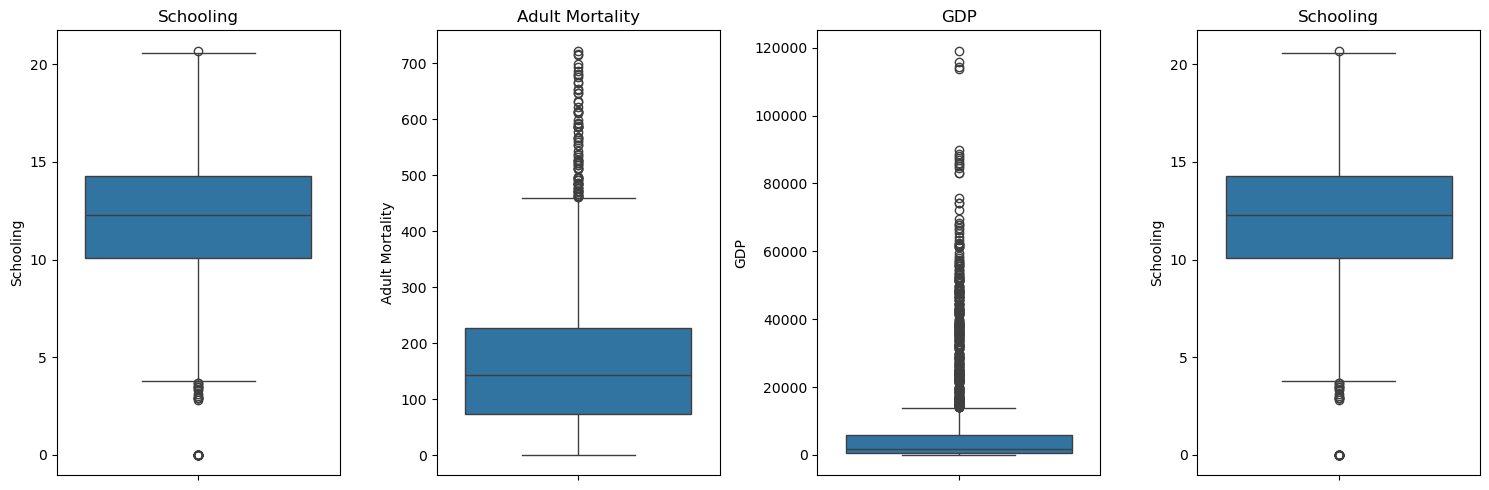

Размер датасета до удаления выбросов: (2938, 22)
Размер датасета после удаления выбросов: (2020, 22)
Удалено 918 строк (31.25% данных)

Данные после масштабирования:
       Year  Life expectancy   Adult Mortality  infant deaths   Alcohol  \
0  1.600123         -0.435772         0.989325       0.180952 -1.084273   
1  1.383295         -1.037793         1.065489       0.195284 -1.084273   
2  1.166468         -1.037793         1.036928       0.209615 -1.084273   
3  0.949640         -1.085010         1.075010       0.231112 -1.084273   
4  0.732813         -1.120423         1.103571       0.245444 -1.084273   

   percentage expenditure  Hepatitis B  Measles       BMI   \
0               -0.477963    -0.625565 -0.116029 -0.907937   
1               -0.472187    -0.746065 -0.173307 -0.933339   
2               -0.472971    -0.665732 -0.178672 -0.958742   
3               -0.460191    -0.545232  0.025261 -0.984144   
4               -0.643173    -0.505066  0.044815 -1.004466   

   under-f

In [42]:
# 1. Обзор структуры данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Загрузка данных
file_path = "C:\\Users\\vadim\\jupyter-workspace\\AI_ML_LR_6\\data\\life_expectancy.csv"
data = pd.read_csv(file_path)

# Проверим реальные названия столбцов
print("Столбцы в датасете:", data.columns.tolist())

# Попробуем найти столбец, который может быть целевой переменной
# Обычно он может называться по-разному, например:
possible_target_names = ['Life expectancy', 'Life_Expectancy', 'LifeExpectancy', 'Life expectancy (years)', 'target']
target_col = None

for name in possible_target_names:
    if name in data.columns:
        target_col = name
        break

if target_col is None:
    # Если ни одно из стандартных названий не подошло, используем последний столбец как целевую переменную
    target_col = data.columns[-1]
    print(f"\nЦелевая переменная не найдена, используем последний столбец: {target_col}")

print("\nПервые 5 строк датасета:")
print(data.head())
print("\nИнформация о датасете:")
print(data.info())
print("\nОписательная статистика:")
print(data.describe(include='all'))

selected_features = [target_col] + ['Adult Mortality', 'GDP', 'Schooling']
selected_features = [col for col in selected_features if col in data.columns]

# Визуализация выбросов с помощью boxplot
plt.figure(figsize=(15, 5))
for i, col in enumerate(selected_features, 1):
    plt.subplot(1, len(selected_features), i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Удаление выбросов с помощью метода IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

print(f"Размер датасета до удаления выбросов: {data.shape}")
data_clean = remove_outliers(data, selected_features)
print(f"Размер датасета после удаления выбросов: {data_clean.shape}")
print(f"Удалено {len(data) - len(data_clean)} строк ({((len(data) - len(data_clean))/len(data))*100:.2f}% данных)")

# Масштабирование числовых признаков (кроме целевой переменной)
numeric_features = data_clean.select_dtypes(include=['int64', 'float64']).columns
numeric_features = numeric_features.drop('Life expectancy', errors='ignore')  # исключаем целевую переменную

scaler = StandardScaler()
data_scaled = data_clean.copy()
data_scaled[numeric_features] = scaler.fit_transform(data_scaled[numeric_features])

print("\nДанные после масштабирования:")
print(data_scaled[numeric_features].head())

# Анализ категориальных признаков
categorical_features = data_scaled.select_dtypes(include=['object']).columns
print("\nКатегориальные признаки:", categorical_features)

# Label Encoding для порядковых признаков (если есть)
# Пример для признака 'Income composition of resources' (если он порядковый)
if 'Income composition of resources' in categorical_features:
    le = LabelEncoder()
    data_scaled['Income composition of resources'] = le.fit_transform(data_scaled['Income composition of resources'])

# One-Hot Encoding для номинальных признаков
nominal_features = ['Country', 'Status']  # пример номинальных признаков
data_encoded = pd.get_dummies(data_scaled, columns=nominal_features, drop_first=True)  # drop_first для избежания дамми-ловушки

print("\nДанные после кодирования:")
print(data_encoded.head())

# Проверка на дамми-ловушку
print("\nПроверка на дамми-ловушку:")
print(f"Количество столбцов до One-Hot Encoding: {len(data_scaled.columns)}")
print(f"Количество столбцов после One-Hot Encoding: {len(data_encoded.columns)}")


# Проверка финального датасета
print("\nФинальная информация о датасете:")
print(data_encoded.info())

# Сохранение обработанных данных
output_path = "C:\\Users\\vadim\\jupyter-workspace\\AI_ML_LR_6\\data\\life_expectancy_processed.csv"
data_encoded.to_csv(output_path, index=False)
print(f"\nОбработанные данные сохранены по пути: {output_path}")

# Вывод первых 5 строк финального датасета
print("\nПервые 5 строк финального датасета:")
print(data_encoded.head())